# Perceptron.  Regresión lineal simple.  Ejemplo básico

## Importamos las librerías

In [38]:
# Para este ejemplo, necesitamos numpy sí o sí.
import numpy as np
import keras as kr

# Utilizamos estas 2 librerías sólo para visualizar los datos.
# En condiciones normales no las usaremos.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generamos los datos (aleatorios)

In [39]:
# Generamos 1000 observaciones
observations = 1000000

np.random.seed(123)

# Usaremos 2 variables como datos de entrada.  Podemos verlas como x1 y x2 de lo visto en la presentación
# Las nombraremos x y z
# Generamos los datos de manera aleatoria a través de una distribución uniforme. Necesitamos 3 argumentos; low, high, size.
# El tamaño de xs (x size) y zs (z size) es el de las observaciones por 1. En este caso: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combinamos las 2 dimensiones de entrada en una matriz de entrada
inputs = np.column_stack((xs,zs))

# Comprobamos si las dimensiones de los valores de entrada que deberán ser 1000x2
print (inputs.shape)

(1000000, 2)


## Generamos los datos de la variable objetivo

In [40]:
# Usaremos la siguiente función lineal:
# f(x,z) = 2x - 3z + 5 + <ruido>
np.random.seed(123)
noise = np.random.uniform(-1, 1, (observations,1))

# Generamos las salidas, de acuerdo a la funcion
# Donde los pesos son 2 y -3 y el bias es 5
targets = 2*xs - 3*zs + 5 + noise
#targets = 13 * xs + 7 * zs -12

# Comprobamos las dimensiones de targets, que deberían ser de 1000x1
print (targets.shape)

(1000000, 1)


In [41]:
targets

array([[ -3.11017315],
       [ -2.00905147],
       [ 22.33083141],
       ...,
       [ -7.84796712],
       [-11.1994956 ],
       [-22.97291321]])

## Pintamos los datos

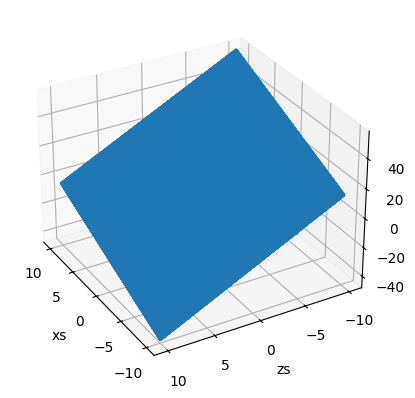

In [42]:
# Necesitamos que los datos tengan las dimensiones correctas
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
targets = targets.reshape(observations,)


# Declaramos el objeto imagen
fig = plt.figure()

# Metodo para crear un plot 3d
ax = fig.add_subplot(111, projection='3d')

# Increase the chunksize - this will break the plotting into smaller chunks.
plt.rcParams['agg.path.chunksize'] = 10000

# Elegimos los ejes
ax.plot(xs, zs, targets)

# Definimos las etiquetas
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# A través de esta variable podemos modificar el ángulo de visión.
# Prueba con diferentes valores
ax.view_init(azim= 150)

# Pintamos
plt.show()

# Devolvemos los datos a sus dimensiones originales.
# El cambio era sólo para pintarlos.
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

## Inicialización de las variables

In [43]:
# Inicializamos los pesos y bias de manera aletoria, a través de init_range
# Valores altos en init_range evitarán que el algoritmo sea capaz de aprender.
np.random.seed(123)
init_range = 0.1

# Los pesos tienen unas dimesniones de k x m, donde k es el número de variables de entrada y and m es el número de variables
# de salida
# En nuestro caso, la matriz de pesos es de 2x1 (2 variables de entrada, 'x' y 'z' y una variable de salida 'y')
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# El bías, sólo tendrá una dimensión, puesto que sólo hay una variable de salida. Por tanto, será un escalar
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[ 0.03929384]
 [-0.04277213]]
[-0.05462971]


## Definimos el ratio de aprendizaje

In [44]:
# Ratios demasiado altos harán que nuestra red no aprenda y demasiado bajos, que no alcance el objetivo para
# las repeticiones definidas.
# Juega con este ratio para ver los resultados
learning_rate = 0.0001

## Entrenamos el modelo

In [45]:
# Vamos a iterar 100 veces a lo largo de nuestro set de entrenamiento que funciona bien para el ratio de entrenamiento de 0.02
for i in range (100):

    # Generamos el modelo lineal basado en: y = xw + b
    # np.dot permite la multiplicación de matrices
    outputs = np.dot(inputs,weights) + biases
    # Los deltas, son las diferencias entre los targets y los outputs
    # Los deltas en este caso son un vector de 1000x1
    deltas = outputs - targets

    # La idea es iterar para conseguir reducir el error cuadrático medio

    loss = np.sum(deltas**2)/2 / observations

    # Printamos el error cuadrático medio
    print ("loss: ", loss)
    print ("pesos: ", weights)
    print ("bias: ", biases, "\n")

    # Otro truco que vamos a usar, es escalar los deltas en base a las observaciones
    # Ésto nos ayuda a seleccionar mejor el ratio de aprendizaje, ya que estará
    # en la misma escala (propoción) que el error cuadrático medio
    deltas_scaled = deltas / observations

    # Para terminar, aplicamos el descenso del gradiente para poder encontrar el mínimo local
    # Las dimensiones de los pesos son 2x1, el ratio de entrenamiento 1x1 (escalar), inputs 1000x2 y los
    # deltas escalados 1000x1.
    # Para poder aplicar el procedimiento, debemos transponer los inputs
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

    # Los pesos se actualizan de forma algebraica lineal (una matriz menos otra matriz)
    # Los sesgos, sin embargo, son un solo número aquí, por lo que debemos transformar los deltas en un escalar.
    # Las dos líneas son ambas consistentes con la metodología de descenso de gradiente.

loss:  229.08572391353303
pesos:  [[ 0.03929384]
 [-0.04277213]]
bias:  [-0.05462971] 

loss:  227.64419028545933
pesos:  [[ 0.04615503]
 [-0.05262425]]
bias:  [-0.05412655] 

loss:  226.21222992204991
pesos:  [[ 0.05299339]
 [-0.06244354]]
bias:  [-0.05362344] 

loss:  224.7897791407697
pesos:  [[ 0.05980897]
 [-0.07223011]]
bias:  [-0.05312037] 

loss:  223.3767746827305
pesos:  [[ 0.06660185]
 [-0.08198405]]
bias:  [-0.05261734] 

loss:  221.97315370987025
pesos:  [[ 0.07337212]
 [-0.09170549]]
bias:  [-0.05211436] 

loss:  220.57885380215487
pesos:  [[ 0.08011984]
 [-0.10139454]]
bias:  [-0.05161142] 

loss:  219.19381295479678
pesos:  [[ 0.08684509]
 [-0.11105129]]
bias:  [-0.05110852] 

loss:  217.8179695754928
pesos:  [[ 0.09354795]
 [-0.12067586]]
bias:  [-0.05060566] 

loss:  216.4512624816798
pesos:  [[ 0.10022849]
 [-0.13026835]]
bias:  [-0.05010285] 

loss:  215.0936308978089
pesos:  [[ 0.10688678]
 [-0.13982887]]
bias:  [-0.04960008] 

loss:  213.74501445263866
pesos:  [[ 

## Pintamos los pesos y los biases y comprobamos si son correctos

In [46]:
# Cuando hemos declarado f(x,z), los pesos eran 2 y -3, mientras que el bias era 5.
# Deberíamos obtener datos iguales
print (weights, biases)

# Vemos que CASI convergen, por lo que son necesarias más iteraciones.

[[ 0.62369054]
 [-0.88180726]] [-0.0045283]


## Pintamos los outputs vs los targets

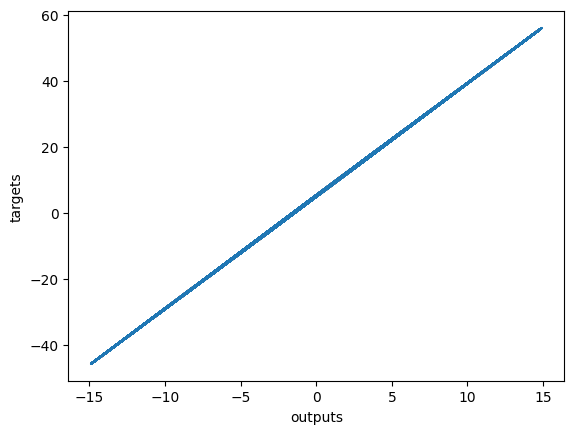

In [47]:
# Cuanto más cercanos sea el gráfico a una línea de 45 grados, más cercanos son los valores output y target.
# Ésto es un ejercicio académico para entender el procedimiento puesto que no se realiza habitualmente.

plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()